In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

In [2]:
import os, shutil, pathlib

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

In [4]:
train_dataset = image_dataset_from_directory(
    'c:/Users/admin/Documents/Datasets/cats_vs_dogs_small/train/',
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    'c:/Users/admin/Documents/Datasets/cats_vs_dogs_small/validation/',
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    'c:/Users/admin/Documents/Datasets/cats_vs_dogs_small/test/',
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)])

In [7]:
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same', use_bias=False)(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same', use_bias=False)(x)
    
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = layers.Conv2D(size, 1, strides=2, padding='same', use_bias=False)(residual)
    x = layers.add([x, residual])
    
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['sequential[1][0]']             
                                                                                                  
 conv2d_1 (Conv2D)              (None, 176, 176, 32  2400        ['rescaling_1[0][0]']      

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='mini_xception_like.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [11]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 24s 218ms/step - loss: 0.7328 - accuracy: 0.5420 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 14s 214ms/step - loss: 0.6729 - accuracy: 0.5935 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 13s 209ms/step - loss: 0.6408 - accuracy: 0.6295 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 13s 210ms/step - loss: 0.6310 - accuracy: 0.6475 - val_loss: 0.7150 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 13s 209ms/step - loss: 0.6036 - accuracy: 0.6715 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 6/100
63/63 [==============================] - 13s 205ms/step - loss: 0.5911 - accuracy: 0.6945 - val_loss: 0.7699 - val_accuracy: 0.5000
Epoch 7/100
63/63 [==============================] - 13s 209ms/step - loss: 0.5594 - accuracy: 0.7285 - val_loss: 0.8734 - val_accuracy:

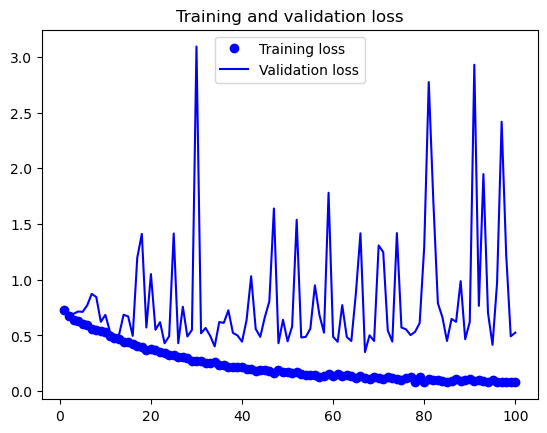

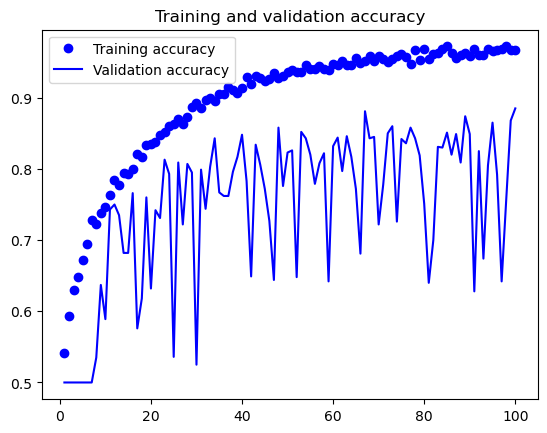

In [13]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['loss'])+1)
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()